In [1]:
library('readr')
library('reshape2')
library('ggplot2')
library('rgdal')
library('ggmap')

source('common_stats_functions.r')

calcs <- get_locCalcs_and_stats()

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.3, released 2019/10/28
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.2.1, November 1st, 2019, [PJ_VERSION: 620]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


Regions defined for each Polygons


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/allyr_ushcn_calcs_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  elev = col_character(),
  state = col_character(),
  name = col_character(),
  flag1 = col_character(),
  flag2 = col_character(),
  flag3 = col_character()
)
See spec(...) for full column specifications.


[1] "1218 USHCN sites total"
[1] "Maximum percent of record missing (all stations) = 15.2551878855861"
[1] "Maximum years of data missing (all stations) = 22.6666666666667"
[1] "Minimum number of years in record (all stations) = 106.25"
[1] "0 sites have 12mo SPEI trends assigned NA"
[1] "252 non-significant 12mo SPEI trends (alpha=0.05)"
[1] "475 non-significant 12mo SPEI trends (alpha=0.05,Bonferroni corrected)"
[1] "0 sites have 12mo SPEI CV trends assigned NA"
[1] "148 non-significant 12mo SPEI CV trends (alpha=0.05)"
[1] "345 non-significant 12mo SPEI CV trends (alpha=0.05,Bonferroni corrected)"


In [2]:
dim(calcs)
head(calcs)

[1] 1218   28

stationid,latitude,longitude,elev,state,name,flag1,flag2,flag3,utcoffset,⋯,prcp_cv5yr_trend,prcp_cv5yr_trend_sig,spei12mo_trend,spei12mo_trend_sig,spei12mo_cv5yr_trend,spei12mo_cv5yr_trend_sig,spi12mo_trend,spi12mo_trend_sig,spi12mo_cv5yr_trend,spi12mo_cv5yr_trend_sig
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,31.0581,-87.0547,25.9,AL,BREWTON 3 SSE,------,------,------,6,⋯,-3.082635e-06,5.181877e-01,4.948660e-04,4.281059e-17,-5.418599e-05,1.450005e-23,3.475070e-04,4.515042e-09,-2.761315e-05,1.117645e-08
USH00012813,30.5467,-87.8808,7.0,AL,FAIRHOPE 2 NE,------,------,------,6,⋯,5.832594e-05,1.395250e-27,2.871429e-04,1.332174e-06,1.828267e-05,7.089053e-04,3.154710e-04,1.066194e-07,1.294170e-05,1.344355e-02
USH00013160,32.8347,-88.1342,38.1,AL,GAINESVILLE LOCK,011694,------,------,6,⋯,-1.006481e-04,1.951328e-83,2.030824e-04,6.633134e-04,-2.064144e-05,8.391407e-05,2.282740e-04,1.295231e-04,-3.163045e-05,8.261308e-10
USH00013511,32.7017,-87.5808,67.1,AL,GREENSBORO,------,------,------,6,⋯,-4.603313e-05,1.517411e-34,-5.681463e-06,9.233457e-01,-1.147154e-05,5.703395e-02,8.473712e-05,1.509880e-01,-2.727170e-05,4.638926e-06
USH00013816,31.8700,-86.2542,132.0,AL,HIGHLAND HOME,------,------,------,6,⋯,-4.880355e-05,4.188936e-25,3.157518e-04,1.032076e-07,-3.465651e-06,5.319998e-01,1.730071e-04,3.667829e-03,1.637979e-05,3.540241e-03
USH00015749,34.7442,-87.5997,164.6,AL,MUSCLE SHOALS AP,------,------,------,6,⋯,-1.990534e-05,5.019340e-05,4.272818e-04,1.014964e-12,1.449213e-06,8.349459e-01,5.983068e-04,7.816069e-24,-4.647953e-05,5.760756e-15


Warning message:
“Removed 475 rows containing missing values (geom_point).”

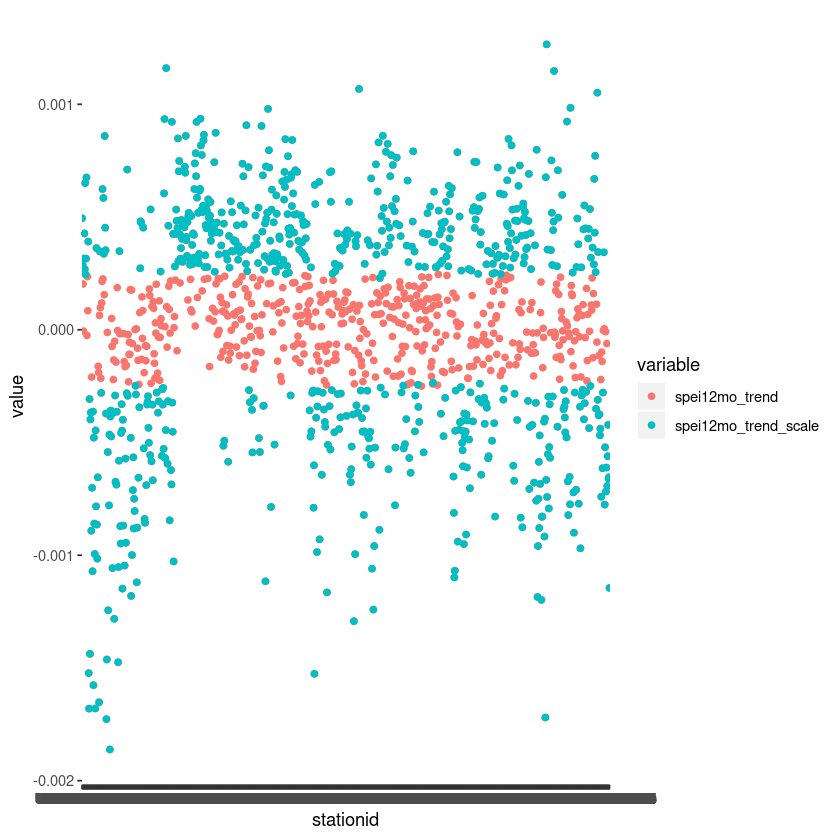

In [3]:
# Remove bad sites and calculate missing data
calcs$spei12mo_trend_scale <- calcs$spei12mo_trend
#test <- (calcs$spei12mo_trend_scale > 0.0025 | calcs$spei12mo_trend_scale < -0.0025) | calcs$spei12mo_trend_sig > 0.05
test <- calcs$spei12mo_trend_sig > 0.05/1217 # can be bonferroni corrected for multiple comparisons
calcs$spei12mo_trend_scale[test] <- NA

calcs_m <- melt(calcs, id.var='stationid', measure.var=c('spei12mo_trend', 'spei12mo_trend_scale'))
ggplot(calcs_m,aes(stationid,value))+geom_point(aes(color=variable))

In [4]:
min(calcs$spei12mo_trend_scale[!is.na(calcs$spei12mo_trend_scale)])

[1] -0.001861531

## SPEI and CV of SPEI trend maps

Source : http://tile.stamen.com/terrain/4/2/5.png
Source : http://tile.stamen.com/terrain/4/3/5.png
Source : http://tile.stamen.com/terrain/4/4/5.png
Source : http://tile.stamen.com/terrain/4/5/5.png
Source : http://tile.stamen.com/terrain/4/2/6.png
Source : http://tile.stamen.com/terrain/4/3/6.png
Source : http://tile.stamen.com/terrain/4/4/6.png
Source : http://tile.stamen.com/terrain/4/5/6.png


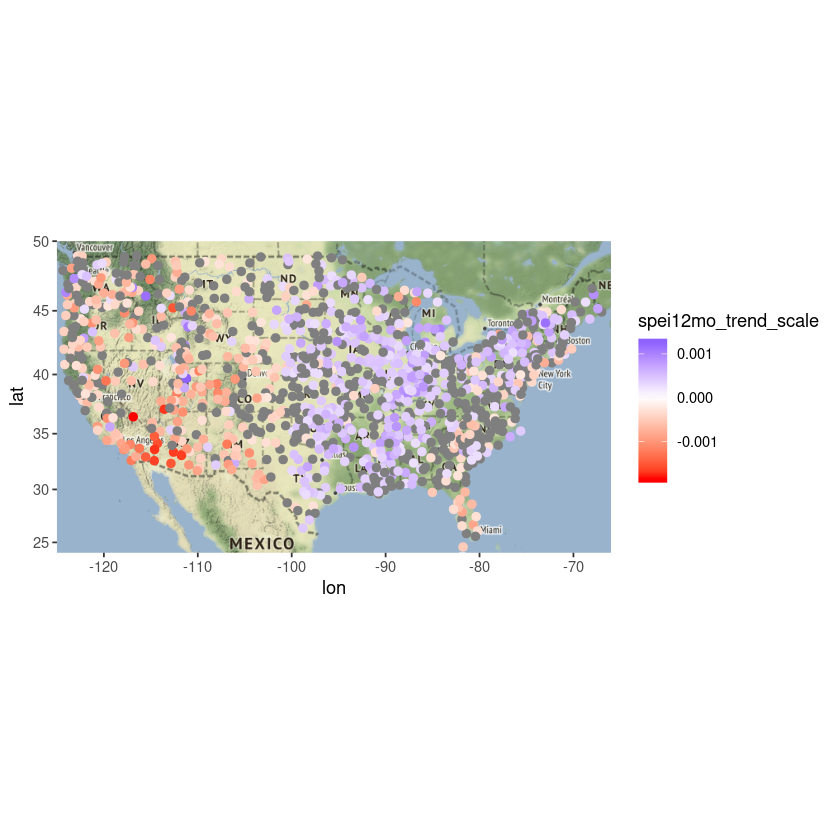

In [5]:
# SPEI - this is 12 month SPEI trend plotted across the continental US
library('tmaptools') # using a new geocoder (geocode_OSM) since google now requires api key
na <- get_map(c(-125, 24, -66, 50), zoom=4, source='stamen')
#na <- get_map(rbind(as.numeric(paste(geocode_OSM("Lincoln, Nebraska")$bbox))), zoom=6)
namap <- ggmap(na)
namap + geom_point(aes(x=longitude,y=latitude,col=spei12mo_trend_scale), size=2,data=calcs) +
        scale_colour_gradient2(low='red', high='blue')

In [6]:
# CV - this is is the 5 year rolling CV of 12 month SPEI plotted across the continental US
calcs$spei12mo_cv5yr_trend_scale <- calcs$spei12mo_cv5yr_trend
test <- calcs$spei12mo_cv5yr_trend_sig > 0.05/1217 #(bonferroni corrected)
calcs$spei12mo_cv5yr_trend_scale[test] <- NA

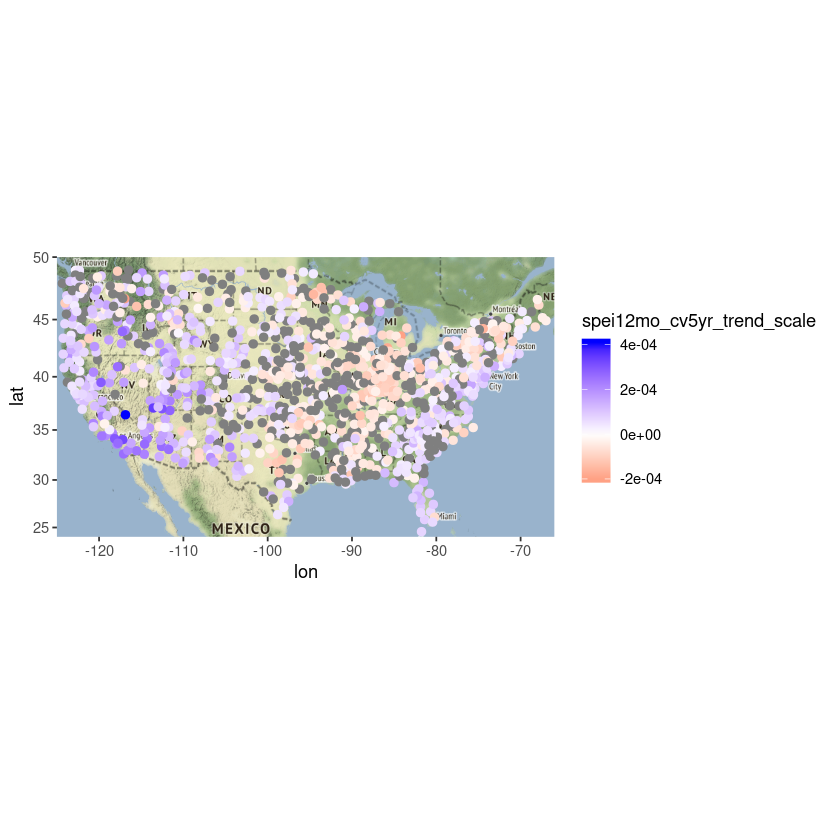

In [7]:
namap + geom_point(aes(x=longitude,y=latitude,col=spei12mo_cv5yr_trend_scale), size=2, data=calcs) +
        scale_colour_gradient2(low='red', high='blue')

# BLUE = increasing variability in SPEI, RED = decreasing

In [8]:
# These are trends calculated in monthly spei over nyears (full record). Convert to decadal trend
calcs['spei12mo_trend_scaleC'] = (calcs$spei12mo_trend_scale * 12 * calcs$nyears)/10
calcs['spei12mo_cv5yr_trend_scaleC'] = (calcs$spei12mo_cv5yr_trend_scale * 12 * calcs$nyears)/10
head(calcs)

stationid,latitude,longitude,elev,state,name,flag1,flag2,flag3,utcoffset,⋯,spei12mo_cv5yr_trend,spei12mo_cv5yr_trend_sig,spi12mo_trend,spi12mo_trend_sig,spi12mo_cv5yr_trend,spi12mo_cv5yr_trend_sig,spei12mo_trend_scale,spei12mo_cv5yr_trend_scale,spei12mo_trend_scaleC,spei12mo_cv5yr_trend_scaleC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,31.0581,-87.0547,25.9,AL,BREWTON 3 SSE,------,------,------,6,⋯,-5.418599e-05,1.450005e-23,3.475070e-04,4.515042e-09,-2.761315e-05,1.117645e-08,0.0004948660,-5.418599e-05,0.07452682,-0.00816041
USH00012813,30.5467,-87.8808,7.0,AL,FAIRHOPE 2 NE,------,------,------,6,⋯,1.828267e-05,7.089053e-04,3.154710e-04,1.066194e-07,1.294170e-05,1.344355e-02,0.0002871429,NA,0.04324373,NA
USH00013160,32.8347,-88.1342,38.1,AL,GAINESVILLE LOCK,011694,------,------,6,⋯,-2.064144e-05,8.391407e-05,2.282740e-04,1.295231e-04,-3.163045e-05,8.261308e-10,NA,NA,NA,NA
USH00013511,32.7017,-87.5808,67.1,AL,GREENSBORO,------,------,------,6,⋯,-1.147154e-05,5.703395e-02,8.473712e-05,1.509880e-01,-2.727170e-05,4.638926e-06,NA,NA,NA,NA
USH00013816,31.8700,-86.2542,132.0,AL,HIGHLAND HOME,------,------,------,6,⋯,-3.465651e-06,5.319998e-01,1.730071e-04,3.667829e-03,1.637979e-05,3.540241e-03,0.0003157518,NA,0.04755222,NA
USH00015749,34.7442,-87.5997,164.6,AL,MUSCLE SHOALS AP,------,------,------,6,⋯,1.449213e-06,8.349459e-01,5.983068e-04,7.816069e-24,-4.647953e-05,5.760756e-15,0.0004272818,NA,0.06370771,NA


In [9]:
interp_spei12mo_trend <- krige_area(calcs[!is.na(calcs$spei12mo_trend_scaleC),], 'spei12mo_trend_scaleC', 'latitude', 'longitude', map_base_data=map_data('usa'))
interp_cvtrend <- krige_area(calcs[!is.na(calcs$spei12mo_cv5yr_trend_scaleC),], 'spei12mo_cv5yr_trend_scaleC', 'latitude', 'longitude', map_base_data=map_data('usa'))


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following objects are masked from ‘package:reshape2’:

    dcast, melt

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]
[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]


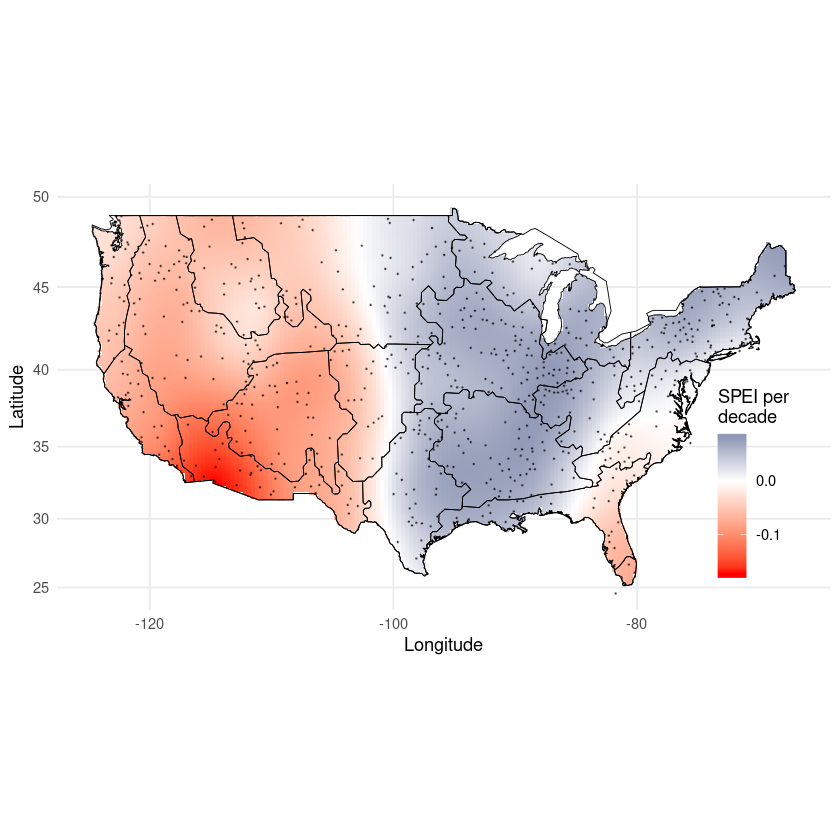

In [10]:
spei_trend <- plot_interp(interp_spei12mo_trend, 'spei12mo_trend_scaleC_pred',
                          'SPEI per\ndecade',
                          calcs[!is.na(calcs$spei12mo_trend_scaleC),], plot_contours=F,
                          lowCol='red',midCol='white',highCol='#003366', midpt=0)
spei_trend

In [11]:
ggsave('../figs/conusDom_spei_trend.pdf')
ggsave('../figs/conusDom_spei_trend.png', dpi=600)
#ggsave('../figs/conusDom_spei_trend.svg')

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


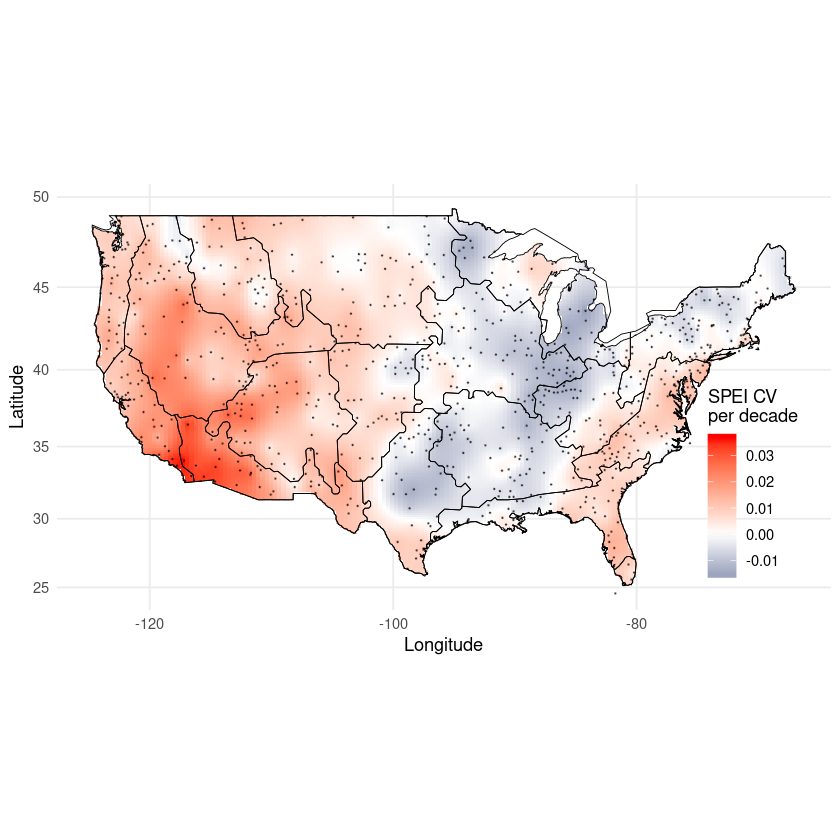

In [12]:
speiCV_trend <- plot_interp(interp_cvtrend, 'spei12mo_cv5yr_trend_scaleC_pred',
                          'SPEI CV\nper decade',
                          calcs[!is.na(calcs$spei12mo_cv5yr_trend_scaleC),], plot_contours=F,
                          lowCol='#003366',midCol='white',highCol='red', midpt=0)
speiCV_trend

In [13]:
ggsave('../figs/conusDom_speiCV_trend.pdf')
ggsave('../figs/conusDom_speiCV_trend.png', dpi=600)
#ggsave('../figs/conusDom_speiCV_trend_RedisBad.svg')

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [14]:
library('cowplot', 'repr')
fig1g = spei_trend +
  theme(
      axis.text.x=element_blank(),
      axis.title.x=element_blank(),
      legend.position = c(0.915, 0.30),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)

fig2g = speiCV_trend +
  theme(
      #axis.text.x=element_blank(),
      #axis.title.x=element_blank(),
      #axis.title.y=element_blank(),
      legend.position = c(0.935, 0.30),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggmap’:

    theme_nothing



In [15]:
options(repr.plot.width=6, repr.plot.height=5.3)
fig3 = plot_grid(fig1g, fig2g, labels = c("A", "B"), ncol = 1, align='h')

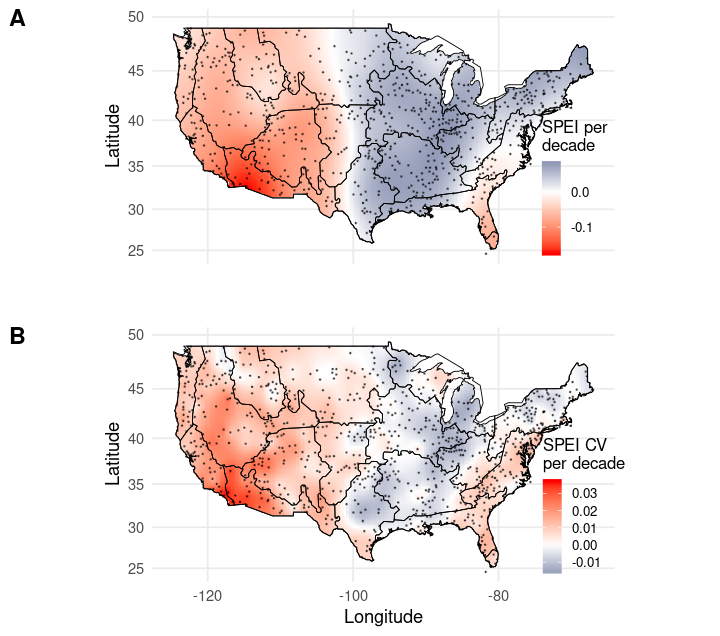

In [16]:
fig3

In [17]:
ggsave('../figs/conusDom_SPEI+CV_trend.pdf', width=6, height=5.3, dpi=600)
ggsave('../figs/conusDom_SPEI+CV_trend.png', width=6, height=5.3, dpi=600)